In [ ]:
# This calculates where a lens should go in GPI to re-image the Lyot stop
# in the new PupilCam

# Created 2021 Dec 6 by E.S

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

%matplotlib qt

In [12]:
# Try grids of

# M: 0.01 to 1

M_array = np.linspace(0.01, 1.0, num=100, endpoint=True)

In [13]:
alpha_array = np.divide(np.add(106.7*M_array,137.35),np.subtract(1.,M_array))

/Users/bandari/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [15]:
plt.plot(M_array,alpha_array)
plt.show()

In [17]:
A_const = 137.35
B_const = 106.7
alpha_array_2 = np.linspace(10., 60., num=100)

In [18]:
f_array = np.divide(np.multiply((B_const-alpha_array_2),(A_const-alpha_array_2)),(A_const+B_const))

In [20]:
plt.plot(alpha_array_2,f_array)
plt.show()

In [2]:
# Try grids of

# n_l: 1.49 to 1.80
# R: 10 mm to 1000 mm

n_l_array = np.linspace(1.49, 1.80, num=10, endpoint=True)
R_array = np.linspace(10., 1000., num=100, endpoint=True)

In [3]:
# Thick lensmaker's formula: 1/f =

def thick_lens(n_l_pass, R_pass, d_l_pass):
    
    f_inv = np.multiply((n_l_pass-1.),((2./R_pass) + 
                                       np.divide(
                                           np.multiply(
                                               (n_l_pass-1.),d_l_pass),np.multiply(n_l_pass,np.power(R_pass,2.)))
                                      )
                       )
    
    return f_inv

In [4]:
# make DataFrame holding permutations of lens parameters

df = pd.DataFrame(product(n_l_array, R_array), columns=["n_l","R"])

In [5]:
# find effective focal length for each combination

df["f"] = np.divide(1.,thick_lens(df["n_l"],df["R"],d_l_pass=4.))

In [6]:
# find s_i

df["s_i"] = np.multiply(0.65,df["f"])

In [7]:
# find minimum acceptable values of alpha

df["alpha_min"] = np.subtract(137.35,df["s_i"])

In [8]:
df_physical = df.where(np.logical_and(df["alpha_min"] > 10,df["alpha_min"] < 60)).dropna()

In [21]:
df

,n_l,R,f,s_i,alpha_min
0,1.49,10.0,9.574359,6.223333,131.126667
1,1.49,20.0,19.758391,12.842954,124.507046
2,1.49,30.0,29.955502,19.471077,117.878923
3,1.49,40.0,40.156043,26.101428,111.248572
4,1.49,50.0,50.357981,32.732688,104.617312
...,...,...,...,...,...
995,1.80,960.0,599.444958,389.639223,-252.289223
996,1.80,970.0,605.694953,393.701720,-256.351720
997,1.80,980.0,611.944948,397.764216,-260.414216
998,1.80,990.0,618.194943,401.826713,-264.476713


In [18]:
df_physical.iloc[50]

n_l            1.662222
R            240.000000
f            180.608440
s_i          117.395486
alpha_min     19.954514
Name: 523, dtype: float64

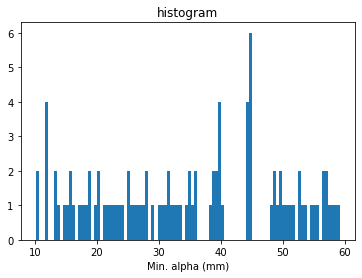

In [20]:
plt.hist(df_physical["alpha_min"], bins=100)
plt.xlabel("Min. alpha (mm)")
plt.title("histogram")
plt.savefig("junk.pdf")

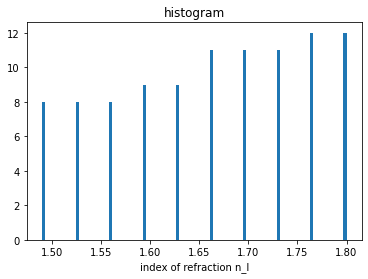

In [24]:
plt.hist(df_physical["n_l"], bins=100)
plt.xlabel("index of refraction n_l")
plt.title("histogram")
plt.savefig("junk.pdf")

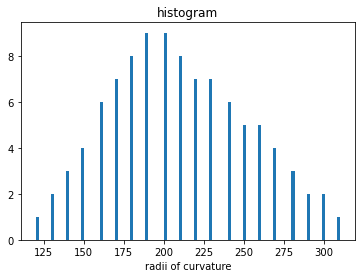

In [23]:
plt.hist(df_physical["R"], bins=100)
plt.xlabel("radii of curvature")
plt.title("histogram")
plt.savefig("junk.pdf")